
# ARIMA Model 


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\karth\Downloads\ARIMA-And-Seasonal-ARIMA-master\ARIMA-And-Seasonal-ARIMA-master\perrin-freres-monthly-champagne-.csv")
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
df.columns=['month','sales']
df.head()

,month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.isnull().sum()

month    1
sales    2
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

month    0
sales    0
dtype: int64

In [7]:
df.tail()

,month,sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   105 non-null    object 
 1   sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [9]:
#Converting Into DateTime Mode
df["month"]=pd.to_datetime(df["month"])

In [10]:
df.set_index(["month"],inplace=True)

# Step 2 - Visualize the Data

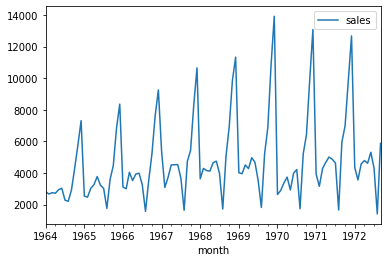

In [11]:
df.plot()
plt.show()

In [12]:
# Test to check wheter its stationary or not

from statsmodels.tsa.stattools import adfuller

test_result=adfuller(df)
test_result

(-6.130515910840621,
 8.423981643024428e-08,
 0,
 104,
 {'1%': -3.4948504603223145,
  '5%': -2.889758398668639,
  '10%': -2.5818220155325444},
 nan)

In [13]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels=["ADF Test statistic","P-value","#Lags used","Number of Obervation Used"]
    for value,labels in zip(result,labels):
        print( labels+":"+str(value))
    if result[1]<=0.05:
        print("Reject Null Hypothesis(Ho),and its Stationary")
    else:
        print("Fail to reject Hypothesis and its not-statinory")

In [14]:
adfuller_test(df["sales"])

ADF Test statistic:-1.8335930563276246
P-value:0.3639157716602442
#Lags used:11
Number of Obervation Used:93
Fail to reject Hypothesis and its not-statinory


# Differencing

In [15]:
df["Sales Difference "]= df["sales"]-df["sales"].shift(1)

In [16]:
df

,sales,Sales Difference
month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
...,...,...
1972-05-01,4618.0,-170.0
1972-06-01,5312.0,694.0
1972-07-01,4298.0,-1014.0


In [17]:
df['Seasonal First Difference']=df['sales']-df['sales'].shift(12)

In [18]:
df

,sales,Sales Difference,Seasonal First Difference
month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
...,...,...,...
1972-05-01,4618.0,-170.0,-392.0
1972-06-01,5312.0,694.0,438.0
1972-07-01,4298.0,-1014.0,-335.0


In [19]:
## Again Test Dickey Fuller Test
adfuller_test(df["Seasonal First Difference"].dropna())

ADF Test statistic:-7.626619157213164
P-value:2.060579696813685e-11
#Lags used:0
Number of Obervation Used:92
Reject Null Hypothesis(Ho),and its Stationary


<AxesSubplot:xlabel='month'>

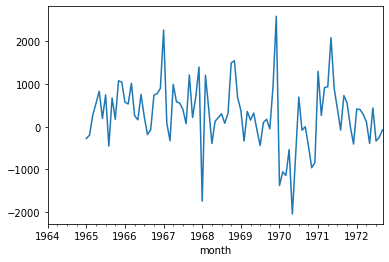

In [20]:
df["Seasonal First Difference"].plot()

# Step-3  Auto Regressive Model

In [21]:
import statsmodels.api as sm

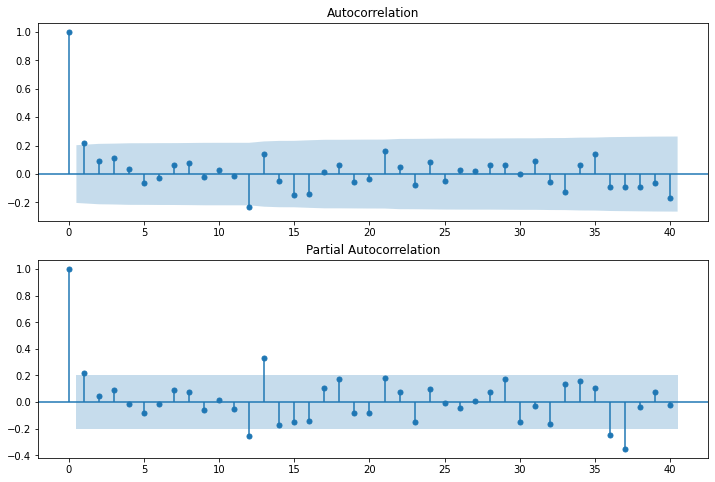

In [22]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df["Seasonal First Difference"].dropna(),lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df["Seasonal First Difference"].dropna(),lags=40,ax=ax2)

In [24]:
# For non-seasonal data
# p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

arima_result=ARIMA(df["sales"],order=(1,1,1))
model_fit=arima_result.fit()

C:\Users\karth\anaconda3\envs\model\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\karth\anaconda3\envs\model\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [25]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Tue, 15 Dec 2020   AIC                           1910.251
Time:                        11:16:13   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7848     12.405      1.837      0.066      -1.529      47.099
ar.L1.D.sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='month'>

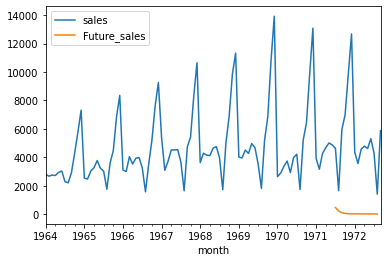

In [26]:
df["Future_sales"]=model_fit.predict(start=90,end=103,dynamic=True)
df[["sales","Future_sales"]].plot()

In [27]:
SARIMAX=sm.tsa.statespace.SARIMAX(df["sales"],order=(1,1,1),seasonal_order=(1, 1, 1, 12))

C:\Users\karth\anaconda3\envs\model\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\karth\anaconda3\envs\model\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [30]:
SARIMAX_result=SARIMAX.fit()

In [31]:
df["future"]=SARIMAX_result.predict(start=90,end=103,dynamic=True)

<AxesSubplot:xlabel='month'>

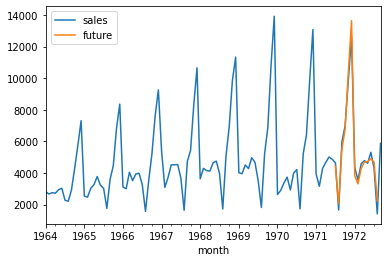

In [32]:
df[["sales","future"]].plot()

# Step 4 : Predicting Future

In [57]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [58]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [59]:
future_datest_df.tail()

,sales,Sales Difference,Seasonal First Difference,Future_sales,future
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [60]:
future_df=pd.concat([df,future_datest_df])

In [61]:
future_df

,sales,Sales Difference,Seasonal First Difference,Future_sales,future
1964-01-01,2815.0,NaN,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN,NaN
...,...,...,...,...,...
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

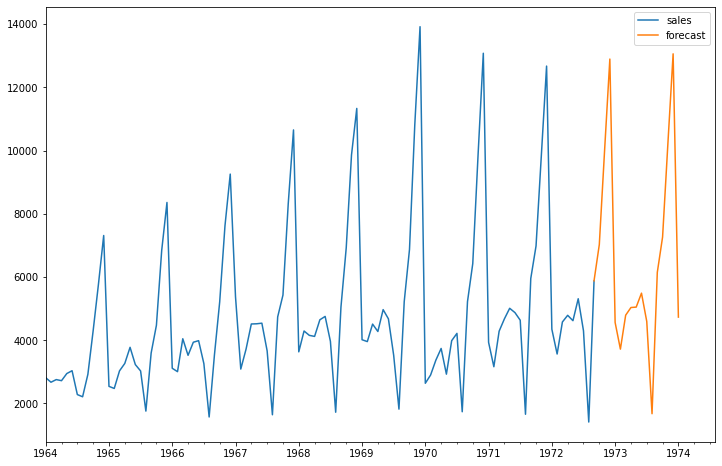

In [64]:
future_df['forecast'] = SARIMAX_result.predict(start = 104, end = 120, dynamic= True)  
future_df[['sales', 'forecast']].plot(figsize=(12, 8)) 